## Des algorithmes d'apprentissage supervisé les plus importants
- Linear Regression
- k-Nearest Neighbors
- Logistic Regression
- Support Vector Machines (SVMs)
- Decision Trees and Random Forests
- Neural networks

https://scikit-learn.org/stable/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import operator
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
X=pd.DataFrame(X,columns={"variable"})
X=X.variable.sort_values().values.reshape((m, 1))
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

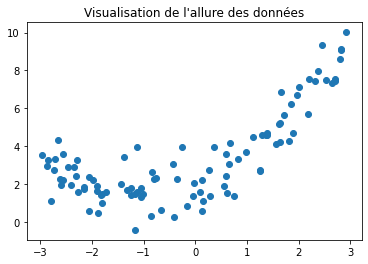

In [3]:
plt.figure()
plt.scatter(X,y)
plt.title("Visualisation de l'allure des données")
plt.show()

une parabole est un polynome de degré 2

In [4]:
degree = 2
poly_features = PolynomialFeatures(degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.9668673])

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00838435]), array([[1.04370258, 0.4994835 ]]))

In [6]:
poly_t = lin_reg.predict(X_poly)

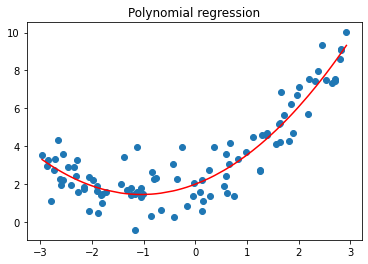

In [7]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,poly_t,"r")
plt.title("Polynomial regression")
plt.show()

Version Marwa

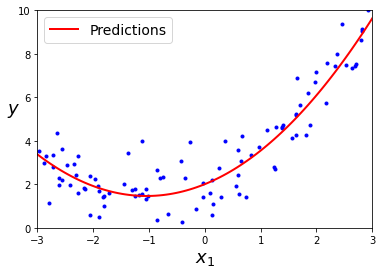

In [8]:
# Nouvelles données générées
X_new = np.linspace(-3,3,100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

fig, ax = plt.subplots()
ax.plot(X, y, 'b.')
ax.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Version Paul

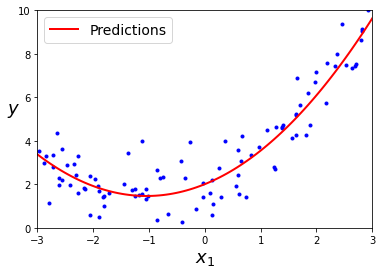

In [9]:
# Nouvelles données générées
steps = 100
x_new = np.linspace(min(X), max(X), steps).reshape(steps, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

fig, ax = plt.subplots()
ax.plot(X, y, 'b.')
ax.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Version en séparant les données en 2 data set      
Dataset trop petit pour le découper

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_poly = poly_features.transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train)

X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)

In [11]:
X_new = np.linspace(-3,3,100).reshape(100, 1)
X_new_poly2 = poly_features.transform(X_new)
y_new2 = lin_reg.predict(X_new_poly2)

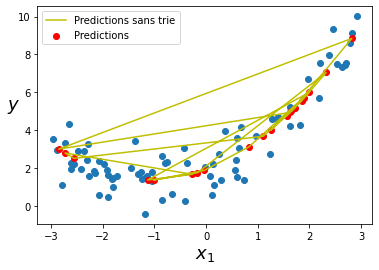

In [12]:
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
#ax.plot()
# ax.plot(X, y, 'b.')
#ax.plot(x_p, y_test_2, 'g.', label="Valeurs attendues")
ax.plot(X_test, y_new, 'y-', label="Predictions sans trie")
ax.scatter(X_test, y_new, color='red', label="Predictions")
#ax.plot(X_new, y_new2, 'g-', label="Predictions2")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend()
# plt.axis([-3, 3, 0, 10])
# fig.set_size_inches(15, 7, forward=True)
plt.show()

In [13]:
print(type(X_new_poly), len(X_new_poly), X_new_poly.shape)
X_new_poly

<class 'numpy.ndarray'> 20 (20, 2)


array([[ 1.56471029e+00,  2.44831830e+00],
       [ 1.85038409e+00,  3.42392128e+00],
       [ 1.65079694e+00,  2.72513054e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [-2.84748524e+00,  8.10817219e+00],
       [ 1.62580308e+00,  2.64323565e+00],
       [ 1.24843547e+00,  1.55859111e+00],
       [ 1.89276857e+00,  3.58257286e+00],
       [ 2.32327646e+00,  5.39761349e+00],
       [-1.66710449e-01,  2.77923738e-02],
       [-1.01461185e+00,  1.02943721e+00],
       [-3.72264218e-02,  1.38580648e-03],
       [ 8.25344828e-01,  6.81194085e-01],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.12973354e+00,  1.27629788e+00],
       [-2.63580095e-01,  6.94744663e-02],
       [-2.72863627e+00,  7.44545588e+00],
       [-2.55269614e+00,  6.51625757e+00],
       [ 1.10539816e+00,  1.22190509e+00],
       [ 1.71105577e+00,  2.92771184e+00]])

In [14]:
print(type(y_new), len(y_new), y_new.shape)

<class 'numpy.ndarray'> 20 (20, 1)


In [15]:
np_arrr = np.concatenate((X_new_poly, y_new, y_test), axis=1)
np_arrr

array([[ 1.56471029e+00,  2.44831830e+00,  4.78257970e+00,
         4.10884472e+00],
       [ 1.85038409e+00,  3.42392128e+00,  5.56905265e+00,
         6.21889834e+00],
       [ 1.65079694e+00,  2.72513054e+00,  5.01097639e+00,
         6.87913672e+00],
       [ 2.81945911e+00,  7.94934969e+00,  8.84584442e+00,
         9.07082476e+00],
       [-2.84748524e+00,  8.10817219e+00,  3.01509872e+00,
         3.29836163e+00],
       [ 1.62580308e+00,  2.64323565e+00,  4.94390050e+00,
         5.17967460e+00],
       [ 1.24843547e+00,  1.55859111e+00,  4.00719402e+00,
         2.70727441e+00],
       [ 1.89276857e+00,  3.58257286e+00,  5.69270177e+00,
         4.70937333e+00],
       [ 2.32327646e+00,  5.39761349e+00,  7.05057575e+00,
         7.43486413e+00],
       [-1.66710449e-01,  2.77923738e-02,  1.76473683e+00,
         8.56649413e-01],
       [-1.01461185e+00,  1.02943721e+00,  1.38200069e+00,
         1.46539498e+00],
       [-3.72264218e-02,  1.38580648e-03,  1.88655766e+00,
      

In [16]:
# sort the values of x before line plot
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(np_arrr, key=sort_axis)
np.sort(np_arrr, axis=0)
x_p = np_arrr[:,0:2]
y_poly_pred_P = np_arrr[:,2]
y_test_2 = np_arrr[:,3]

In [17]:
x_p

array([[ 1.56471029e+00,  2.44831830e+00],
       [ 1.85038409e+00,  3.42392128e+00],
       [ 1.65079694e+00,  2.72513054e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [-2.84748524e+00,  8.10817219e+00],
       [ 1.62580308e+00,  2.64323565e+00],
       [ 1.24843547e+00,  1.55859111e+00],
       [ 1.89276857e+00,  3.58257286e+00],
       [ 2.32327646e+00,  5.39761349e+00],
       [-1.66710449e-01,  2.77923738e-02],
       [-1.01461185e+00,  1.02943721e+00],
       [-3.72264218e-02,  1.38580648e-03],
       [ 8.25344828e-01,  6.81194085e-01],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.12973354e+00,  1.27629788e+00],
       [-2.63580095e-01,  6.94744663e-02],
       [-2.72863627e+00,  7.44545588e+00],
       [-2.55269614e+00,  6.51625757e+00],
       [ 1.10539816e+00,  1.22190509e+00],
       [ 1.71105577e+00,  2.92771184e+00]])

In [18]:
y_poly_pred_P

array([4.7825797 , 5.56905265, 5.01097639, 8.84584442, 3.01509872,
       4.9439005 , 4.00719402, 5.69270177, 7.05057575, 1.76473683,
       1.38200069, 1.88655766, 3.12658029, 5.99730034, 1.38555117,
       1.68458   , 2.80719608, 2.52539531, 3.68941952, 5.17526514])

In [19]:
y_test_2

array([4.10884472, 6.21889834, 6.87913672, 9.07082476, 3.29836163,
       5.1796746 , 2.70727441, 4.70937333, 7.43486413, 0.85664941,
       1.46539498, 1.39716875, 3.35057573, 7.14257739, 3.97165751,
       3.96161276, 2.77441978, 3.62083477, 4.49817358, 5.64874461])

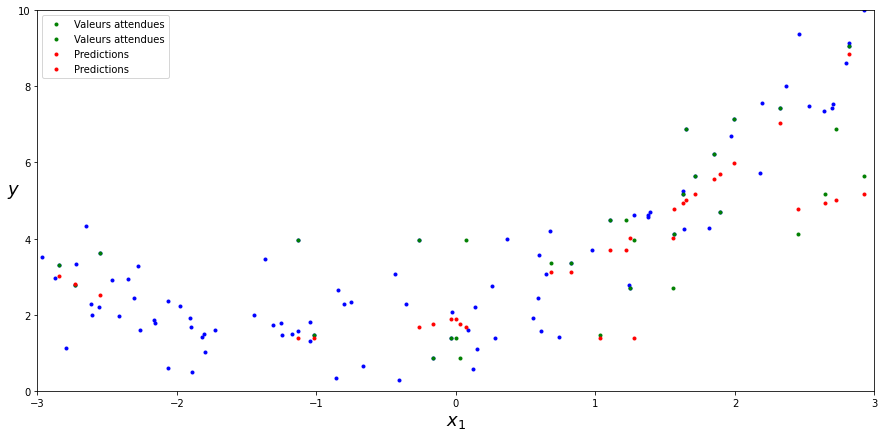

In [20]:
fig, ax = plt.subplots()
ax.plot(X, y, 'b.')
ax.plot(x_p, y_test_2, 'g.', label="Valeurs attendues")
ax.plot(x_p, y_poly_pred_P, 'r.', label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend()
plt.axis([-3, 3, 0, 10])
fig.set_size_inches(15, 7, forward=True)
plt.show()

In [21]:
polyreg=make_pipeline(poly_features,LinearRegression())

In [22]:
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

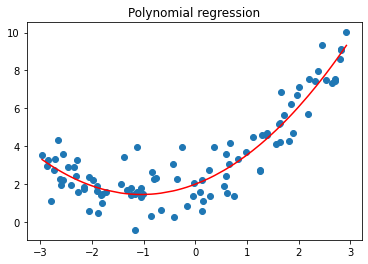

In [23]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,poly_t,color="red")
plt.title("Polynomial regression")
plt.show()

In [34]:
degree=2
polyreg_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_model.fit(X,y)
y_poly_pred = polyreg_model.predict()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')

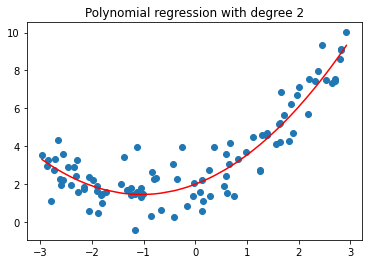

In [25]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,polyreg.predict(X),color="red")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

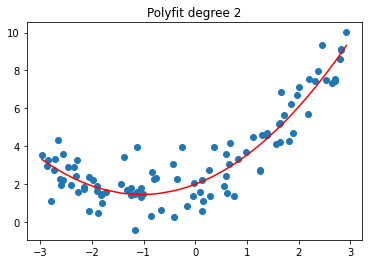

In [26]:
coefs = np.polyfit(X.flatten(), y.flatten(), degree)
plt.figure()
plt.plot(X, np.polyval(coefs, X), color="red")
plt.title("Polyfit degree "+str(degree))
plt.scatter(X,y)
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

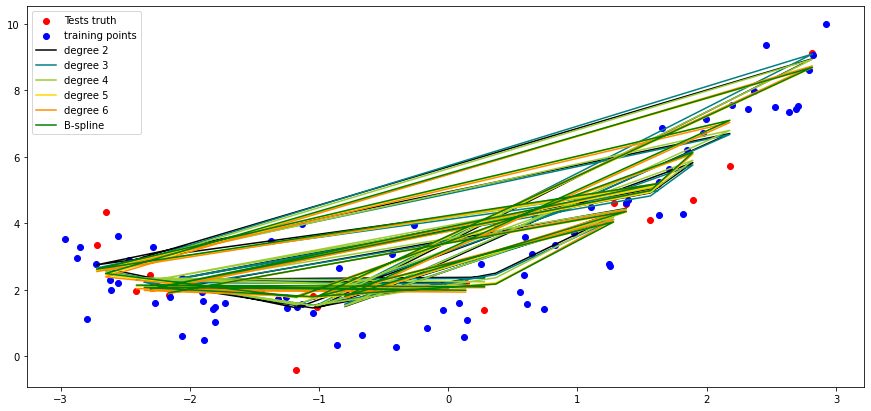

In [28]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.scatter(X_test, y_test, label="Tests truth", color="red")

# plot training points
ax.scatter(X_train, y_train, label="training points", color="blue")

# polynomial features
for degree in range(2, 7):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_test)
    ax.plot(X_test, y_plot, label=f"degree {degree}")

# B-spline with 4 + 3 - 1 = 6 basis functions
model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
model.fit(X_train, y_train)

y_plot = model.predict(X_test)
ax.plot(X_test, y_plot, label="B-spline", color="green")
ax.legend()
fig.set_size_inches(15, 7, forward=True)
plt.show()

0.9050176028762573


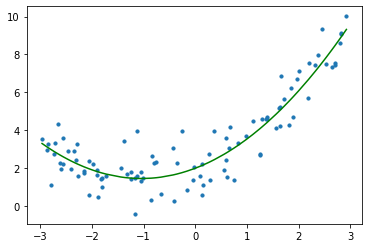

In [29]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
 
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
 
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
print(rmse)
#print(r2)

plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

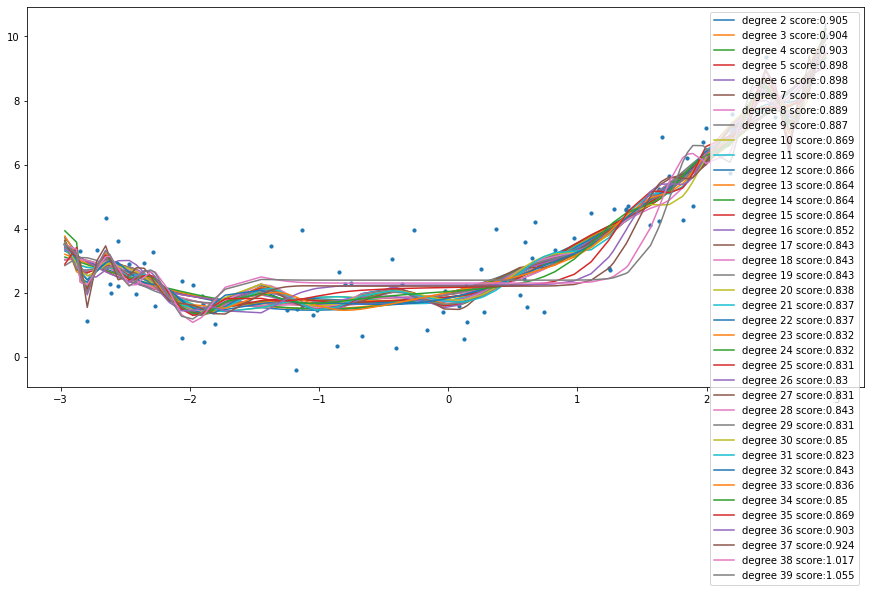

In [30]:
fig, ax = plt.subplots()

ax.scatter(X, y, s=10)

for degree in range(2, 40, 1):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    #r2 = r2_score(y,y_poly_pred)
    # print(rmse)
    #print(r2)

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    ax.plot(x_p, y_poly_pred_P, label=f"degree {degree} score:{round(rmse,3)}")
ax.legend()
fig.set_size_inches(15, 7, forward=True)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

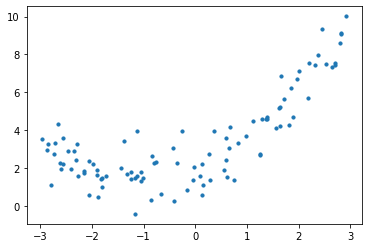

In [31]:
fig, ax = plt.subplots()

ax.scatter(X, y, s=10)

for degree in range(2, 10, 1):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(x_poly, y, train_size=0.8)

    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_poly_pred = model.predict(X_test)
    
    # rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    ax.plot(x_p, y_poly_pred_P, label=f"degree {degree} score:{round(rmse,3)}")
ax.legend()
fig.set_size_inches(15, 7, forward=True)
plt.show()

Code PAUL

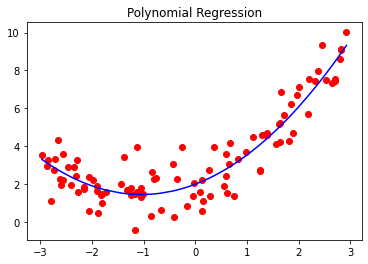

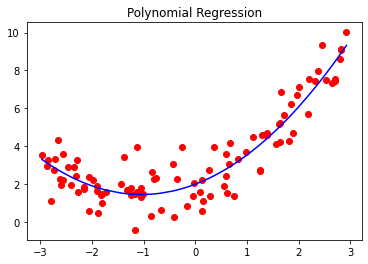

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

"""
Le code en commentaire est pour la version linspace qui j'utilisais au début
Je ne comprends toujours pas tout, donc si vous voyez une erreur/bizzarerie dite le moi
"""
### Génération data
np.random.seed(42)
m = 100
# X = 6 * np.random.rand(m, 1) - 3
X = np.sort(6 * np.random.rand(m, 1) - 3, axis=0)
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

### Polynomial
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

### Regression après Polynomial
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, Y)

### Contruction de la courbe des prédictions
# STEPS = 10
# x_lin = np.linspace(min(X), max(X), STEPS).reshape(STEPS, 1)
# x_lin_predict = poly_lin_reg.predict(poly_reg.fit_transform(x_lin))
x_lin_predict = poly_lin_reg.predict(X_poly)

### Plot
plt.scatter(X, Y, color='r')
#plt.plot(x_lin, x_lin_predict, color='b')
plt.plot(X, x_lin_predict, color='b')
plt.title('Polynomial Regression')
plt.show()

### Contruction de la courbe de prédiction
# STEPS = 10
# x_lin = np.linspace(min(X), max(X), STEPS).reshape(STEPS, 1)
# x_lin_predict = poly_lin_reg.predict(poly_reg.fit_transform(x_lin))
x_lin_predict = poly_lin_reg.predict(poly_reg.fit_transform(X))

### Plot
plt.scatter(X, Y, color='r')
#plt.plot(x_lin, x_lin_predict, color='b')
plt.plot(X, x_lin_predict, color='b')
plt.title('Polynomial Regression')
plt.show()

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

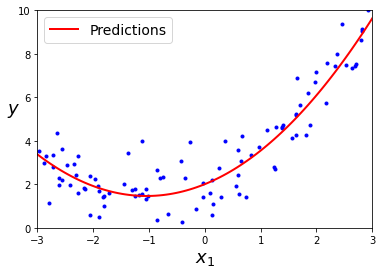

In [38]:
X_new1 = np.linspace(-3,3,100).reshape(100,1)
y_new1 = model.predict(X_new1)
plt.plot(X, y, "b.")
plt.plot(X_new1, y_new1, 'r-', linewidth=2, label='Predictions')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()